In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import string

In [2]:
df_train = pd.read_csv("train.csv")

In [4]:
total_longitudes = []
total_latitudes = []

for idx in range(len(df_train)):

    string_locations = df_train.iloc[idx]['POLYLINE'].split('],[')
    trip_longitudes = np.empty(len(string_locations))
    trip_latitudes = np.empty(len(string_locations))
    
    if len(string_locations) > 1:
        first_point = string_locations[0].strip('[').split(',')
        trip_longitudes[0] = float(first_point[0])
        trip_latitudes[0] = float(first_point[1])

        for i, point in enumerate(string_locations[1:-1]):
            point_split = point.split(',')
            trip_longitudes[i+1] = float(point_split[0])
            trip_latitudes[i+1] = float(point_split[1])

        last_point = string_locations[-1].strip(']').split(',')
        trip_longitudes[-1] = float(last_point[0])
        trip_latitudes[-1] = float(last_point[1])
    elif string_locations[0] != '[]':
        first_point = string_locations[0].strip('[').strip(']').split(',')
        trip_longitudes[0] = float(first_point[0])
        trip_latitudes[0] = float(first_point[1])
    else:
        continue
    
    total_longitudes += trip_longitudes.tolist()
    total_latitudes += trip_latitudes.tolist()
    
print(len(total_longitudes), len(total_latitudes))

83409386 83409386


In [5]:
total_longitudes = np.array(total_longitudes)
total_latitudes = np.array(total_latitudes)

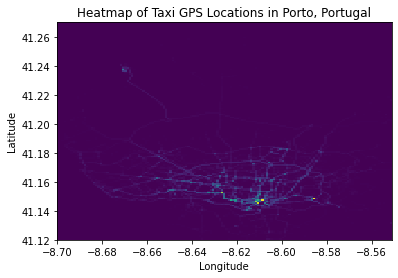

In [11]:
plt.hist2d(total_longitudes,total_latitudes, bins=[np.arange(-8.7,-8.55,0.001),np.arange(41.12,41.27,0.001)])
plt.title("Heatmap of Taxi GPS Locations in Porto, Portugal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()